In [1]:
# ipython magic-s for our pleasure
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# All of the import statements

## all of the external libraries (e.g. Sci-Kit Learn, Pandas)
from fastai.imports import *

## Data transformation tools for the image model we want
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "../../../data/humpback-whale-ident/" # from https://www.kaggle.com/c/humpback-whale-identification/data
architecture = resnet34
size = 1050 # most are 1050x(205 to 700)
batch_size = 16

In [4]:
!ls {PATH}train-images | head -n 5

0000e88ab.jpg
0001f9222.jpg
00029d126.jpg
00050a15a.jpg
0005c1ef8.jpg
ls: write error: Broken pipe


In [5]:
# Side-on image data augmentation
transforms = tfms_from_model(architecture, size, aug_tfms=transforms_side_on, max_zoom=1.1)

In [6]:
!ls {PATH}

models		       test-images  tmp        train-images
sample_submission.csv  test.zip     train.csv  train.zip


In [7]:
labels_csv = f'{PATH}train.csv'

In [8]:
# number of rows of the data (minus 1 for our data)
n = len(list(open(labels_csv))) - 1

In [9]:
# random 20% of rows will be the hold out for cross validation indexes
validation_indices = get_cv_idxs(n)

In [10]:
validation_indices

array([20621, 10152, 21324, ..., 23604,  9644, 12887])

In [11]:
labels_df = pd.read_csv(labels_csv)
labels_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


Since there are `.jpg` in the image name (which is effectively the id), whereas the target is `id`

In [12]:
data = ImageClassifierData.from_csv(PATH, 'train-images', labels_csv, test_name='test-images',
                                   val_idxs=validation_indices, bs=batch_size, tfms=transforms)

In [13]:
data.classes

['new_whale',
 'w_0003639',
 'w_0003c59',
 'w_0027efa',
 'w_00289b1',
 'w_002c810',
 'w_0032a46',
 'w_003bae6',
 'w_00656c0',
 'w_0066399',
 'w_007fefa',
 'w_00904a7',
 'w_009c9c5',
 'w_00a41ba',
 'w_00b3dc2',
 'w_00d50c9',
 'w_00d5466',
 'w_00d5e98',
 'w_00f340d',
 'w_010f858',
 'w_0115c24',
 'w_0118bab',
 'w_012678c',
 'w_0135f5f',
 'w_0140c92',
 'w_015a4bf',
 'w_016f0ea',
 'w_0182687',
 'w_0189b6d',
 'w_01976db',
 'w_01a1d88',
 'w_01cb0c4',
 'w_01cbbbd',
 'w_01d790e',
 'w_01e1b97',
 'w_01e1fe0',
 'w_01ed442',
 'w_01f14e1',
 'w_01fc429',
 'w_02156b0',
 'w_022b708',
 'w_022d2f5',
 'w_02469a1',
 'w_02545ea',
 'w_025911c',
 'w_0277a07',
 'w_027f528',
 'w_0292e15',
 'w_02aa597',
 'w_02c7e9d',
 'w_02d138d',
 'w_02d5c46',
 'w_02e8199',
 'w_02ff6d6',
 'w_0301302',
 'w_030ac9b',
 'w_030c8b0',
 'w_030e2cf',
 'w_03193e5',
 'w_031e1a3',
 'w_0323574',
 'w_03270e3',
 'w_0350bf4',
 'w_03670aa',
 'w_0369a5c',
 'w_036bc54',
 'w_036dbd0',
 'w_037b23f',
 'w_038dfc0',
 'w_038e5c3',
 'w_03a82c1',
 'w_03

In [14]:
len(data.classes), data.classes[:5]

(5005, ['new_whale', 'w_0003639', 'w_0003c59', 'w_0027efa', 'w_00289b1'])

In [15]:
learn = ConvLearner.pretrained(architecture, data, precompute=True)

100%|██████████| 498/498 [07:29<00:00,  1.71it/s]


In [17]:
?learn.lr_find

In [18]:
learn.lr_find()

 77%|███████▋  | 972/1269 [00:08<00:04, 67.45it/s, loss=12]   


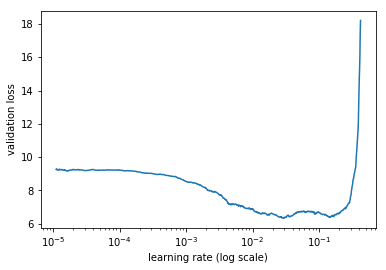

In [20]:
learn.sched.plot()

In [24]:
learning_rate = 5e-3/2

In [25]:
learn.fit(learning_rate, 3, cycle_len=1)

 96%|█████████▌| 1219/1269 [00:06<00:00, 87.28it/s, loss=6.18] 


ValueError: Expected more than 1 value per channel when training, got input size [1, 1024]